In [1]:
library("MASS")

In [2]:
data(Boston)

In [3]:
df <- Boston

In [6]:
library("dplyr")

In [10]:
y <- unlist(dplyr::select(df, medv))
x <- scale(as.matrix(dplyr::select(df, -medv)))

In [13]:
library("glmnet")

In [14]:
fit <- glmnet(x, y, standardize = F)

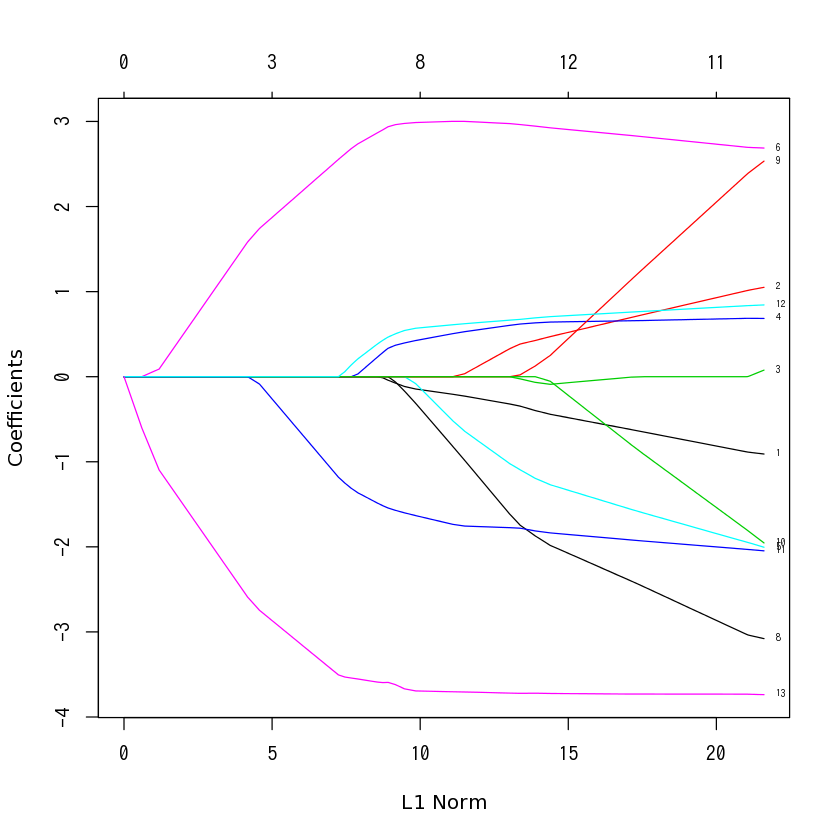

In [17]:
plot(fit, label=T)

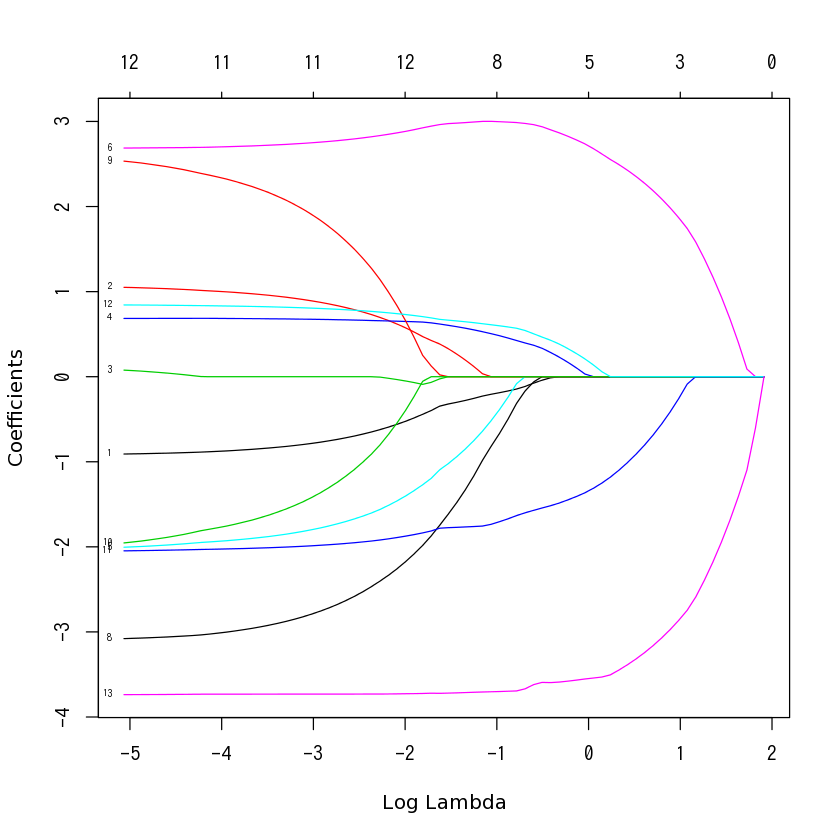

In [18]:
plot(fit, label=T, xvar="lambda")

In [19]:
fit_coef <- coef(fit)
fit_coef <- fit_coef[-1, ]

In [20]:
# 交差検証

In [21]:
cvfit <- cv.glmnet(x, y, standardize=F)

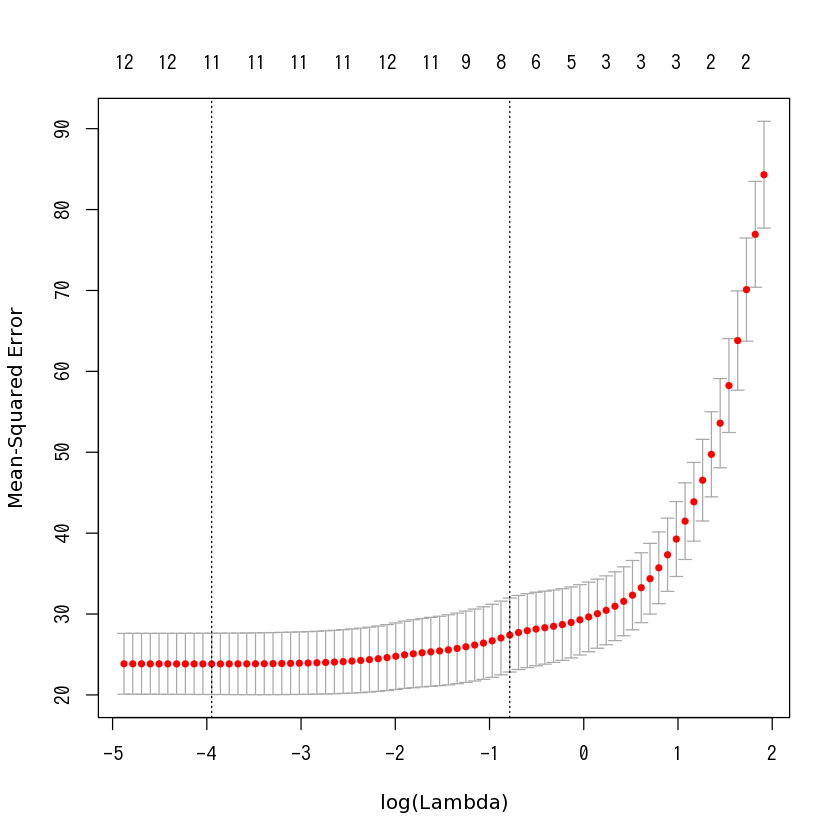

In [22]:
plot(cvfit)

In [23]:
cvfit$lambda.min

[1] 0.01928392

In [24]:
cvfit$lambda.1se

[1] 0.4559662

In [26]:
coef(cvfit, s="lambda.min")

14 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 22.5328063
crim        -0.8721406
zn           0.9978307
indus        .        
chas         0.6848026
nox         -1.9275867
rm           2.7031311
age          .        
dis         -3.0020845
rad          2.3238681
tax         -1.7558197
ptratio     -2.0243069
black        0.8314714
lstat       -3.7313859

In [28]:
coef(cvfit, s="lambda.1se")

14 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 22.5328063
crim        -0.1446842
zn           .        
indus        .        
chas         0.4255147
nox         -0.0821289
rm           2.9874736
age          .        
dis         -0.3142869
rad          .        
tax          .        
ptratio     -1.6328941
black        0.5698562
lstat       -3.6931662

In [29]:
# fused losso

In [31]:
library("genlasso")

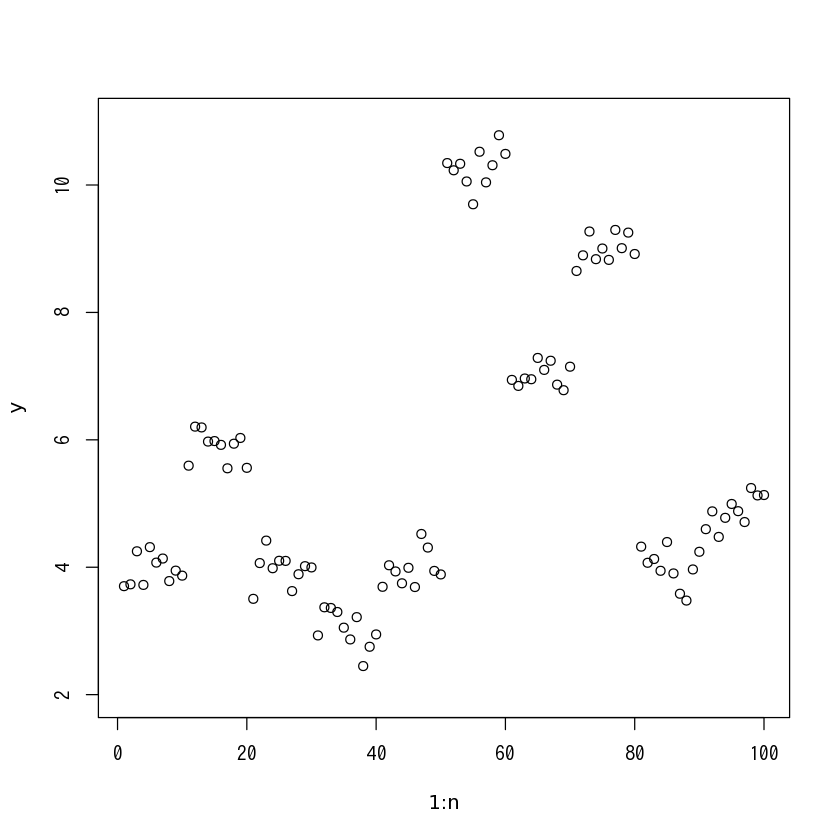

In [46]:
set.seed(71)
n <- 100
beta.true <- rep(sample(1:10, 10, replace=T), each=n/10)
y <- beta.true + rnorm(n, sd=0.25)

lambda <- 2
flasso <- fusedlasso1d(y)
coef <- coef(flasso, lambda=lambda)$beta
plot(1:n, y, ylim=c(2,11))

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'
